# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

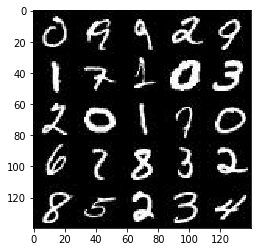

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

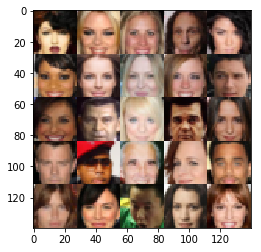

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_inputs = tf.placeholder(tf.float32, (None, image_height, image_width, image_channels), name='real_inputs')
    z_inputs = tf.placeholder(tf.float32, (None, z_dim), name='z_inputs')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    
    return real_inputs, z_inputs, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False, alpha=0.2, rate=0.1):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
#     with tf.variable_scope('discriminator', reuse=reuse):        
#         conv1 = tf.layers.conv2d(images, 32, 3, 2, 'SAME')
#         lrelu1 = tf.maximum(alpha * conv1, conv1)
        
#         conv2 = tf.layers.conv2d(lrelu1, 64, 3, 2, 'SAME')
#         batch_norm2 = tf.layers.batch_normalization(conv2, training=True)
#         lrelu2 = tf.maximum(alpha * batch_norm2, batch_norm2)
        
#         drop = tf.layers.dropout(lrelu2, rate=0.2)

#         conv3 = tf.layers.conv2d(drop, 128, 3, 1, 'SAME')
#         batch_norm3 = tf.layers.batch_normalization(conv3, training=True)
#         lrelu3 = tf.maximum(alpha * batch_norm3, batch_norm3)
        
#         features = tf.reduce_mean(lrelu3, (1, 2))        
#         logits = tf.layers.dense(features, 1)
        
#         output = tf.sigmoid(logits)
        
#         return output, logits
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input Layer
        conv1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        lrelu1 = tf.maximum(alpha * conv1, conv1)
        # Hidden Layer 1
        conv2 = tf.layers.conv2d(lrelu1, 128, 5, strides=1, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        lrelu2 = tf.maximum(alpha * conv2, conv2)
        drop = tf.layers.dropout(lrelu2, rate=rate)
        # Hidden Layer 2
        conv3 = tf.layers.conv2d(drop, 256, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        lrelu3 = tf.maximum(alpha * conv3, conv3)
        # Hidden Layer 3
        flat = tf.reshape(lrelu3, (-1, 7*7*256))
        # Flat layer
        logits = tf.layers.dense(flat, 1)
        
        output = tf.sigmoid(logits)
        
        return output, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        layer1 = tf.layers.dense(z, 7 * 7 * 256)
        layer1 = tf.reshape(layer1, (-1, 7, 7, 256))
        layer1 = tf.layers.batch_normalization(layer1, training=is_train)
        layer1 = tf.maximum(alpha * layer1, layer1)
        
        layer2 = tf.layers.conv2d_transpose(layer1, 128, 5, strides=1, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        layer2 = tf.layers.batch_normalization(layer2, training=is_train)
        layer2 = tf.maximum(alpha * layer2, layer2)
        layer2 = tf.layers.dropout(layer2, rate=0.5)
        
        layer3 = tf.layers.conv2d_transpose(layer2, 64, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        layer3 = tf.layers.batch_normalization(layer3, training=is_train)
        layer3 = tf.maximum(alpha * layer3, layer3)
        layer3 = tf.layers.dropout(layer3, rate=0.1, training=is_train)
        
        # Output layer
        logits = tf.layers.conv2d_transpose(layer3, out_channel_dim, 5, strides=2, padding='same')       
        out = tf.tanh(logits)
        
        return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                              labels=tf.ones_like(d_model_real) * 0.9))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                              labels=tf.zeros_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake

    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                         labels=tf.ones_like(d_model_fake)))
    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
        
        return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    steps = 0
    image_width = data_shape[1]
    image_height = data_shape[2]
    image_channels = data_shape[3]
    # TODO: Build Model   
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    print_every = 10
    show_every = 100
    n_images = 25
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_images = batch_images * 2.0
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                _ = sess.run(d_opt, feed_dict={
                    input_real: batch_images,
                    input_z:    batch_z,
                    lr:         learning_rate
                })
                _ = sess.run(g_opt, feed_dict={
                    input_real: batch_images,
                    input_z:    batch_z,
                    lr:         learning_rate
                })

                if (steps % show_every == 0):
                    show_generator_output(sess, n_images, input_z, image_channels, data_image_mode)
                if (steps % print_every == 0):
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Batch {}/{}...".format(steps % batch_size, batch_size),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                steps += 1

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

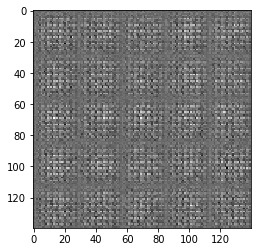

Epoch 1/2... Batch 0/32... Discriminator Loss: 1.3361... Generator Loss: 0.5046
Epoch 1/2... Batch 10/32... Discriminator Loss: 1.3392... Generator Loss: 0.6347
Epoch 1/2... Batch 20/32... Discriminator Loss: 1.3685... Generator Loss: 0.6143
Epoch 1/2... Batch 30/32... Discriminator Loss: 1.6155... Generator Loss: 1.3340
Epoch 1/2... Batch 8/32... Discriminator Loss: 1.3436... Generator Loss: 1.0508
Epoch 1/2... Batch 18/32... Discriminator Loss: 1.3376... Generator Loss: 0.6007
Epoch 1/2... Batch 28/32... Discriminator Loss: 1.3094... Generator Loss: 0.7349
Epoch 1/2... Batch 6/32... Discriminator Loss: 1.3964... Generator Loss: 0.5752
Epoch 1/2... Batch 16/32... Discriminator Loss: 1.3086... Generator Loss: 0.7246
Epoch 1/2... Batch 26/32... Discriminator Loss: 1.3719... Generator Loss: 0.6603


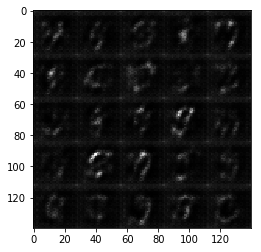

Epoch 1/2... Batch 4/32... Discriminator Loss: 1.3496... Generator Loss: 0.7004
Epoch 1/2... Batch 14/32... Discriminator Loss: 1.3417... Generator Loss: 0.7017
Epoch 1/2... Batch 24/32... Discriminator Loss: 1.3334... Generator Loss: 1.0203
Epoch 1/2... Batch 2/32... Discriminator Loss: 1.3560... Generator Loss: 0.7005
Epoch 1/2... Batch 12/32... Discriminator Loss: 1.4050... Generator Loss: 0.7062
Epoch 1/2... Batch 22/32... Discriminator Loss: 1.3276... Generator Loss: 1.0116
Epoch 1/2... Batch 0/32... Discriminator Loss: 1.3428... Generator Loss: 0.7451
Epoch 1/2... Batch 10/32... Discriminator Loss: 1.8437... Generator Loss: 1.7529
Epoch 1/2... Batch 20/32... Discriminator Loss: 1.3243... Generator Loss: 0.7455
Epoch 1/2... Batch 30/32... Discriminator Loss: 1.4683... Generator Loss: 0.6014


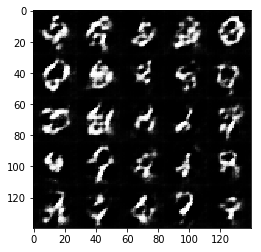

Epoch 1/2... Batch 8/32... Discriminator Loss: 1.4201... Generator Loss: 0.7893
Epoch 1/2... Batch 18/32... Discriminator Loss: 1.3997... Generator Loss: 0.6727
Epoch 1/2... Batch 28/32... Discriminator Loss: 1.3668... Generator Loss: 0.7767
Epoch 1/2... Batch 6/32... Discriminator Loss: 1.4519... Generator Loss: 0.5930
Epoch 1/2... Batch 16/32... Discriminator Loss: 1.5109... Generator Loss: 0.5360
Epoch 1/2... Batch 26/32... Discriminator Loss: 1.3641... Generator Loss: 0.7330
Epoch 1/2... Batch 4/32... Discriminator Loss: 1.4379... Generator Loss: 0.5408
Epoch 1/2... Batch 14/32... Discriminator Loss: 1.3540... Generator Loss: 0.7772
Epoch 1/2... Batch 24/32... Discriminator Loss: 1.3540... Generator Loss: 0.6174
Epoch 1/2... Batch 2/32... Discriminator Loss: 1.3370... Generator Loss: 0.7940


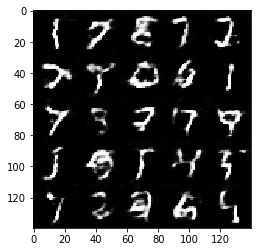

Epoch 1/2... Batch 12/32... Discriminator Loss: 1.4043... Generator Loss: 0.7024
Epoch 1/2... Batch 22/32... Discriminator Loss: 1.3842... Generator Loss: 0.5648
Epoch 1/2... Batch 0/32... Discriminator Loss: 1.3713... Generator Loss: 0.8606
Epoch 1/2... Batch 10/32... Discriminator Loss: 1.3686... Generator Loss: 1.0127
Epoch 1/2... Batch 20/32... Discriminator Loss: 1.3932... Generator Loss: 0.7291
Epoch 1/2... Batch 30/32... Discriminator Loss: 1.3705... Generator Loss: 0.8106
Epoch 1/2... Batch 8/32... Discriminator Loss: 1.3582... Generator Loss: 0.7380
Epoch 1/2... Batch 18/32... Discriminator Loss: 1.3795... Generator Loss: 0.7398
Epoch 1/2... Batch 28/32... Discriminator Loss: 1.3449... Generator Loss: 0.7240
Epoch 1/2... Batch 6/32... Discriminator Loss: 1.6156... Generator Loss: 1.3791


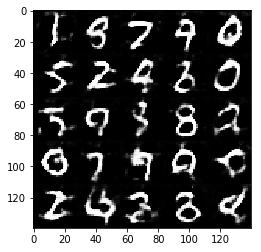

Epoch 1/2... Batch 16/32... Discriminator Loss: 1.3635... Generator Loss: 0.7029
Epoch 1/2... Batch 26/32... Discriminator Loss: 1.3737... Generator Loss: 0.8423
Epoch 1/2... Batch 4/32... Discriminator Loss: 1.7340... Generator Loss: 0.3472
Epoch 1/2... Batch 14/32... Discriminator Loss: 1.2819... Generator Loss: 0.7896
Epoch 1/2... Batch 24/32... Discriminator Loss: 1.3020... Generator Loss: 0.8599
Epoch 1/2... Batch 2/32... Discriminator Loss: 1.3923... Generator Loss: 1.2130
Epoch 1/2... Batch 12/32... Discriminator Loss: 1.3589... Generator Loss: 0.6970
Epoch 1/2... Batch 22/32... Discriminator Loss: 1.3671... Generator Loss: 0.6758
Epoch 1/2... Batch 0/32... Discriminator Loss: 1.4208... Generator Loss: 0.7540
Epoch 1/2... Batch 10/32... Discriminator Loss: 1.2628... Generator Loss: 0.8385


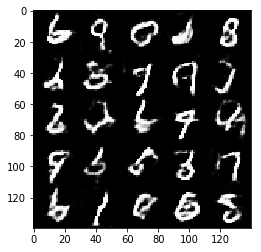

Epoch 1/2... Batch 20/32... Discriminator Loss: 1.3556... Generator Loss: 0.7259
Epoch 1/2... Batch 30/32... Discriminator Loss: 1.4730... Generator Loss: 0.6781
Epoch 1/2... Batch 8/32... Discriminator Loss: 1.4711... Generator Loss: 0.5713
Epoch 1/2... Batch 18/32... Discriminator Loss: 1.2994... Generator Loss: 0.7546
Epoch 1/2... Batch 28/32... Discriminator Loss: 1.4802... Generator Loss: 0.5315
Epoch 1/2... Batch 6/32... Discriminator Loss: 1.3835... Generator Loss: 0.6334
Epoch 1/2... Batch 16/32... Discriminator Loss: 1.2345... Generator Loss: 0.8658
Epoch 1/2... Batch 26/32... Discriminator Loss: 1.3475... Generator Loss: 0.6974
Epoch 1/2... Batch 4/32... Discriminator Loss: 1.5047... Generator Loss: 0.4687
Epoch 1/2... Batch 14/32... Discriminator Loss: 1.4092... Generator Loss: 0.5774


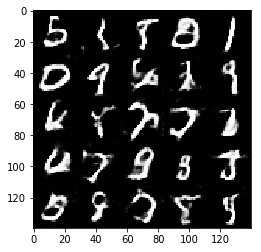

Epoch 1/2... Batch 24/32... Discriminator Loss: 1.3399... Generator Loss: 0.9400
Epoch 1/2... Batch 2/32... Discriminator Loss: 1.4195... Generator Loss: 0.6323
Epoch 1/2... Batch 12/32... Discriminator Loss: 1.3325... Generator Loss: 0.7904
Epoch 1/2... Batch 22/32... Discriminator Loss: 1.3093... Generator Loss: 0.6211
Epoch 1/2... Batch 0/32... Discriminator Loss: 1.3344... Generator Loss: 0.7373
Epoch 1/2... Batch 10/32... Discriminator Loss: 1.2728... Generator Loss: 0.9812
Epoch 1/2... Batch 20/32... Discriminator Loss: 1.2192... Generator Loss: 0.8310
Epoch 1/2... Batch 30/32... Discriminator Loss: 1.6325... Generator Loss: 0.3743
Epoch 1/2... Batch 8/32... Discriminator Loss: 1.4235... Generator Loss: 0.5811
Epoch 1/2... Batch 18/32... Discriminator Loss: 1.2610... Generator Loss: 0.8274


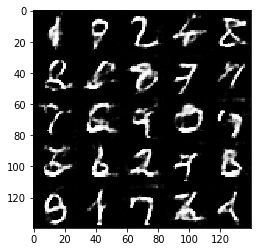

Epoch 1/2... Batch 28/32... Discriminator Loss: 1.3112... Generator Loss: 0.6567
Epoch 1/2... Batch 6/32... Discriminator Loss: 1.2891... Generator Loss: 0.8983
Epoch 1/2... Batch 16/32... Discriminator Loss: 1.2000... Generator Loss: 0.9379
Epoch 1/2... Batch 26/32... Discriminator Loss: 1.2950... Generator Loss: 1.0501
Epoch 1/2... Batch 4/32... Discriminator Loss: 1.3204... Generator Loss: 0.6252
Epoch 1/2... Batch 14/32... Discriminator Loss: 1.2494... Generator Loss: 0.7547
Epoch 1/2... Batch 24/32... Discriminator Loss: 1.3650... Generator Loss: 1.4189
Epoch 1/2... Batch 2/32... Discriminator Loss: 1.3322... Generator Loss: 1.0506
Epoch 1/2... Batch 12/32... Discriminator Loss: 1.2489... Generator Loss: 0.9187
Epoch 1/2... Batch 22/32... Discriminator Loss: 1.3160... Generator Loss: 0.6402


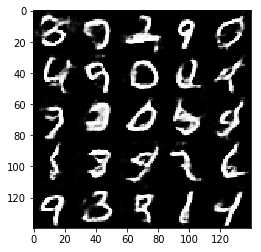

Epoch 1/2... Batch 0/32... Discriminator Loss: 1.2044... Generator Loss: 0.7304
Epoch 1/2... Batch 10/32... Discriminator Loss: 1.2986... Generator Loss: 0.8408
Epoch 1/2... Batch 20/32... Discriminator Loss: 1.3487... Generator Loss: 0.6931
Epoch 1/2... Batch 30/32... Discriminator Loss: 1.2508... Generator Loss: 1.2494
Epoch 1/2... Batch 8/32... Discriminator Loss: 1.2440... Generator Loss: 1.3646
Epoch 1/2... Batch 18/32... Discriminator Loss: 1.3356... Generator Loss: 0.8358
Epoch 1/2... Batch 28/32... Discriminator Loss: 1.3035... Generator Loss: 0.6187
Epoch 1/2... Batch 6/32... Discriminator Loss: 1.5619... Generator Loss: 0.4682
Epoch 1/2... Batch 16/32... Discriminator Loss: 1.2249... Generator Loss: 1.0661
Epoch 1/2... Batch 26/32... Discriminator Loss: 1.2665... Generator Loss: 0.7741


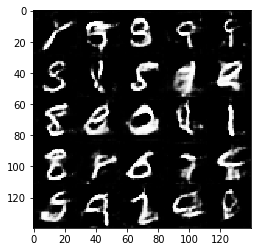

Epoch 1/2... Batch 4/32... Discriminator Loss: 1.2183... Generator Loss: 1.1156
Epoch 1/2... Batch 14/32... Discriminator Loss: 1.2872... Generator Loss: 0.7094
Epoch 1/2... Batch 24/32... Discriminator Loss: 1.2772... Generator Loss: 0.9148
Epoch 1/2... Batch 2/32... Discriminator Loss: 1.2746... Generator Loss: 0.8170
Epoch 1/2... Batch 12/32... Discriminator Loss: 1.4376... Generator Loss: 0.5624
Epoch 1/2... Batch 22/32... Discriminator Loss: 1.2108... Generator Loss: 0.8073
Epoch 1/2... Batch 0/32... Discriminator Loss: 1.2377... Generator Loss: 1.3092
Epoch 1/2... Batch 10/32... Discriminator Loss: 1.4981... Generator Loss: 0.5010
Epoch 1/2... Batch 20/32... Discriminator Loss: 1.1868... Generator Loss: 0.8899
Epoch 1/2... Batch 30/32... Discriminator Loss: 1.3350... Generator Loss: 0.6231


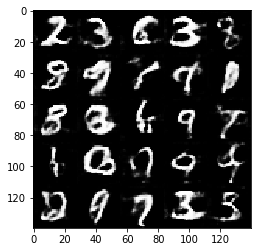

Epoch 1/2... Batch 8/32... Discriminator Loss: 1.1967... Generator Loss: 0.8130
Epoch 1/2... Batch 18/32... Discriminator Loss: 1.2535... Generator Loss: 1.2870
Epoch 1/2... Batch 28/32... Discriminator Loss: 1.2055... Generator Loss: 0.8012
Epoch 1/2... Batch 6/32... Discriminator Loss: 1.1875... Generator Loss: 1.2104
Epoch 1/2... Batch 16/32... Discriminator Loss: 1.2226... Generator Loss: 1.3090
Epoch 1/2... Batch 26/32... Discriminator Loss: 1.2262... Generator Loss: 1.0640
Epoch 1/2... Batch 4/32... Discriminator Loss: 1.4959... Generator Loss: 1.2555
Epoch 1/2... Batch 14/32... Discriminator Loss: 1.2193... Generator Loss: 0.7328
Epoch 1/2... Batch 24/32... Discriminator Loss: 1.2546... Generator Loss: 0.8023
Epoch 1/2... Batch 2/32... Discriminator Loss: 1.4742... Generator Loss: 0.4745


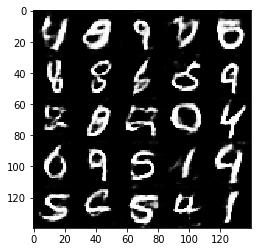

Epoch 1/2... Batch 12/32... Discriminator Loss: 1.2867... Generator Loss: 0.6500
Epoch 1/2... Batch 22/32... Discriminator Loss: 1.2948... Generator Loss: 0.6900
Epoch 1/2... Batch 0/32... Discriminator Loss: 1.2111... Generator Loss: 0.8200
Epoch 1/2... Batch 10/32... Discriminator Loss: 1.2446... Generator Loss: 0.8239
Epoch 1/2... Batch 20/32... Discriminator Loss: 1.3418... Generator Loss: 0.6290
Epoch 1/2... Batch 30/32... Discriminator Loss: 1.3239... Generator Loss: 0.6361
Epoch 1/2... Batch 8/32... Discriminator Loss: 2.4056... Generator Loss: 0.1643
Epoch 1/2... Batch 18/32... Discriminator Loss: 1.2138... Generator Loss: 0.8250
Epoch 1/2... Batch 28/32... Discriminator Loss: 1.1519... Generator Loss: 1.0677
Epoch 1/2... Batch 6/32... Discriminator Loss: 1.1704... Generator Loss: 0.9723


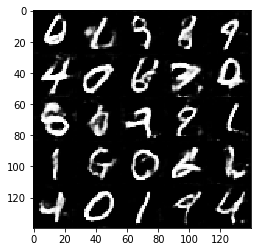

Epoch 1/2... Batch 16/32... Discriminator Loss: 1.1318... Generator Loss: 0.9135
Epoch 1/2... Batch 26/32... Discriminator Loss: 1.2088... Generator Loss: 0.9868
Epoch 1/2... Batch 4/32... Discriminator Loss: 1.2683... Generator Loss: 0.7384
Epoch 1/2... Batch 14/32... Discriminator Loss: 1.2011... Generator Loss: 0.7316
Epoch 1/2... Batch 24/32... Discriminator Loss: 1.1740... Generator Loss: 0.7363
Epoch 1/2... Batch 2/32... Discriminator Loss: 1.1736... Generator Loss: 1.0252
Epoch 1/2... Batch 12/32... Discriminator Loss: 1.2537... Generator Loss: 1.1532
Epoch 1/2... Batch 22/32... Discriminator Loss: 1.2429... Generator Loss: 0.7970
Epoch 1/2... Batch 0/32... Discriminator Loss: 1.1927... Generator Loss: 0.8270
Epoch 1/2... Batch 10/32... Discriminator Loss: 1.1035... Generator Loss: 1.0925


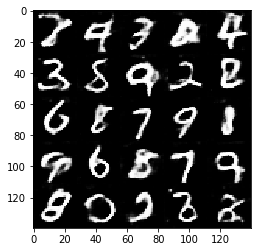

Epoch 1/2... Batch 20/32... Discriminator Loss: 1.1974... Generator Loss: 0.8714
Epoch 1/2... Batch 30/32... Discriminator Loss: 1.0526... Generator Loss: 1.2083
Epoch 1/2... Batch 8/32... Discriminator Loss: 1.1504... Generator Loss: 0.9661
Epoch 1/2... Batch 18/32... Discriminator Loss: 1.3426... Generator Loss: 0.6464
Epoch 1/2... Batch 28/32... Discriminator Loss: 1.2766... Generator Loss: 0.8205
Epoch 1/2... Batch 6/32... Discriminator Loss: 1.1465... Generator Loss: 0.9193
Epoch 1/2... Batch 16/32... Discriminator Loss: 1.1515... Generator Loss: 1.2317
Epoch 1/2... Batch 26/32... Discriminator Loss: 1.2532... Generator Loss: 1.0294
Epoch 1/2... Batch 4/32... Discriminator Loss: 1.2931... Generator Loss: 0.6994
Epoch 1/2... Batch 14/32... Discriminator Loss: 1.0944... Generator Loss: 1.2702


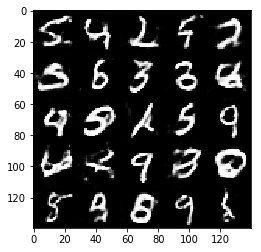

Epoch 1/2... Batch 24/32... Discriminator Loss: 1.2498... Generator Loss: 0.7221
Epoch 1/2... Batch 2/32... Discriminator Loss: 1.1679... Generator Loss: 0.8763
Epoch 1/2... Batch 12/32... Discriminator Loss: 1.2050... Generator Loss: 0.7341
Epoch 1/2... Batch 22/32... Discriminator Loss: 1.1098... Generator Loss: 0.9085
Epoch 1/2... Batch 0/32... Discriminator Loss: 1.3510... Generator Loss: 0.7569
Epoch 1/2... Batch 10/32... Discriminator Loss: 1.4065... Generator Loss: 0.5414
Epoch 1/2... Batch 20/32... Discriminator Loss: 1.1501... Generator Loss: 0.8030
Epoch 1/2... Batch 30/32... Discriminator Loss: 1.1563... Generator Loss: 0.9502
Epoch 1/2... Batch 8/32... Discriminator Loss: 1.0753... Generator Loss: 0.9328
Epoch 1/2... Batch 18/32... Discriminator Loss: 1.1836... Generator Loss: 0.8498


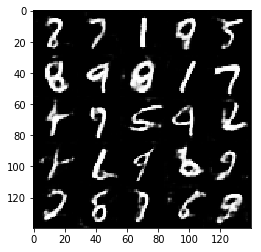

Epoch 1/2... Batch 28/32... Discriminator Loss: 1.1805... Generator Loss: 0.7414
Epoch 1/2... Batch 6/32... Discriminator Loss: 1.0786... Generator Loss: 1.0483
Epoch 1/2... Batch 16/32... Discriminator Loss: 1.4648... Generator Loss: 0.4810
Epoch 1/2... Batch 26/32... Discriminator Loss: 1.1054... Generator Loss: 1.0188
Epoch 1/2... Batch 4/32... Discriminator Loss: 1.2854... Generator Loss: 0.6285
Epoch 1/2... Batch 14/32... Discriminator Loss: 1.2265... Generator Loss: 1.0455
Epoch 1/2... Batch 24/32... Discriminator Loss: 1.1711... Generator Loss: 0.7392
Epoch 1/2... Batch 2/32... Discriminator Loss: 1.0786... Generator Loss: 1.0233
Epoch 1/2... Batch 12/32... Discriminator Loss: 1.0431... Generator Loss: 1.1332
Epoch 1/2... Batch 22/32... Discriminator Loss: 1.1084... Generator Loss: 1.1929


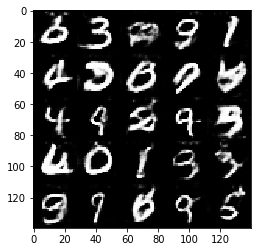

Epoch 1/2... Batch 0/32... Discriminator Loss: 1.1070... Generator Loss: 0.8193
Epoch 1/2... Batch 10/32... Discriminator Loss: 1.2165... Generator Loss: 0.8516
Epoch 1/2... Batch 20/32... Discriminator Loss: 1.1149... Generator Loss: 1.1010
Epoch 1/2... Batch 30/32... Discriminator Loss: 1.1524... Generator Loss: 1.2585
Epoch 1/2... Batch 8/32... Discriminator Loss: 1.0321... Generator Loss: 1.2072
Epoch 1/2... Batch 18/32... Discriminator Loss: 1.1363... Generator Loss: 1.1495
Epoch 1/2... Batch 28/32... Discriminator Loss: 1.0419... Generator Loss: 1.0654
Epoch 1/2... Batch 6/32... Discriminator Loss: 1.2781... Generator Loss: 0.7176
Epoch 1/2... Batch 16/32... Discriminator Loss: 1.3948... Generator Loss: 0.5445
Epoch 1/2... Batch 26/32... Discriminator Loss: 1.2540... Generator Loss: 0.6571


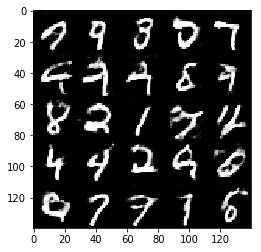

Epoch 1/2... Batch 4/32... Discriminator Loss: 0.9662... Generator Loss: 1.1578
Epoch 1/2... Batch 14/32... Discriminator Loss: 1.0643... Generator Loss: 0.9311
Epoch 1/2... Batch 24/32... Discriminator Loss: 1.1263... Generator Loss: 0.9128
Epoch 1/2... Batch 2/32... Discriminator Loss: 1.0776... Generator Loss: 1.8418
Epoch 1/2... Batch 12/32... Discriminator Loss: 1.1027... Generator Loss: 0.9304
Epoch 1/2... Batch 22/32... Discriminator Loss: 1.2006... Generator Loss: 0.8609
Epoch 1/2... Batch 0/32... Discriminator Loss: 1.1156... Generator Loss: 1.4671
Epoch 1/2... Batch 10/32... Discriminator Loss: 1.1910... Generator Loss: 0.7547
Epoch 1/2... Batch 20/32... Discriminator Loss: 1.2889... Generator Loss: 0.5746
Epoch 1/2... Batch 30/32... Discriminator Loss: 1.0997... Generator Loss: 0.8245


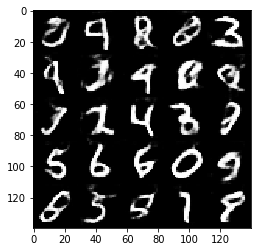

Epoch 1/2... Batch 8/32... Discriminator Loss: 1.0679... Generator Loss: 1.1151
Epoch 1/2... Batch 18/32... Discriminator Loss: 1.8348... Generator Loss: 0.3126
Epoch 1/2... Batch 28/32... Discriminator Loss: 0.9890... Generator Loss: 1.2291
Epoch 1/2... Batch 6/32... Discriminator Loss: 1.0722... Generator Loss: 0.9054
Epoch 1/2... Batch 16/32... Discriminator Loss: 0.9843... Generator Loss: 1.2081
Epoch 1/2... Batch 26/32... Discriminator Loss: 1.2248... Generator Loss: 1.3021
Epoch 1/2... Batch 4/32... Discriminator Loss: 1.0749... Generator Loss: 1.1325
Epoch 1/2... Batch 14/32... Discriminator Loss: 1.1949... Generator Loss: 0.6697
Epoch 2/2... Batch 24/32... Discriminator Loss: 1.1123... Generator Loss: 0.7355
Epoch 2/2... Batch 2/32... Discriminator Loss: 1.0935... Generator Loss: 1.0463


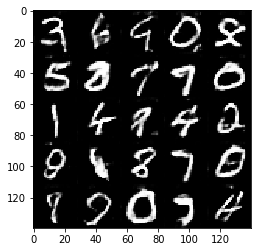

Epoch 2/2... Batch 12/32... Discriminator Loss: 1.5053... Generator Loss: 0.4666
Epoch 2/2... Batch 22/32... Discriminator Loss: 1.2517... Generator Loss: 0.9073
Epoch 2/2... Batch 0/32... Discriminator Loss: 1.0941... Generator Loss: 1.0966
Epoch 2/2... Batch 10/32... Discriminator Loss: 1.3130... Generator Loss: 0.6927
Epoch 2/2... Batch 20/32... Discriminator Loss: 1.0666... Generator Loss: 0.9474
Epoch 2/2... Batch 30/32... Discriminator Loss: 1.2055... Generator Loss: 0.8950
Epoch 2/2... Batch 8/32... Discriminator Loss: 1.0755... Generator Loss: 1.1811
Epoch 2/2... Batch 18/32... Discriminator Loss: 1.0507... Generator Loss: 1.0930
Epoch 2/2... Batch 28/32... Discriminator Loss: 0.9388... Generator Loss: 1.2452
Epoch 2/2... Batch 6/32... Discriminator Loss: 1.3286... Generator Loss: 0.6294


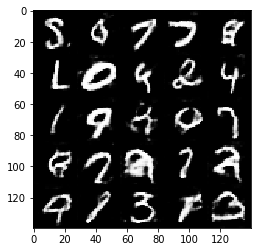

Epoch 2/2... Batch 16/32... Discriminator Loss: 0.9906... Generator Loss: 1.1170
Epoch 2/2... Batch 26/32... Discriminator Loss: 1.1247... Generator Loss: 0.8464
Epoch 2/2... Batch 4/32... Discriminator Loss: 1.1433... Generator Loss: 0.7576
Epoch 2/2... Batch 14/32... Discriminator Loss: 1.1126... Generator Loss: 0.8756
Epoch 2/2... Batch 24/32... Discriminator Loss: 1.1429... Generator Loss: 1.6463
Epoch 2/2... Batch 2/32... Discriminator Loss: 1.0291... Generator Loss: 1.2764
Epoch 2/2... Batch 12/32... Discriminator Loss: 1.0804... Generator Loss: 1.2800
Epoch 2/2... Batch 22/32... Discriminator Loss: 1.0604... Generator Loss: 1.3264
Epoch 2/2... Batch 0/32... Discriminator Loss: 1.1607... Generator Loss: 0.8570
Epoch 2/2... Batch 10/32... Discriminator Loss: 1.0322... Generator Loss: 1.1034


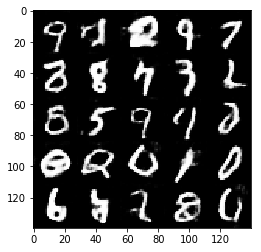

Epoch 2/2... Batch 20/32... Discriminator Loss: 1.1360... Generator Loss: 0.7118
Epoch 2/2... Batch 30/32... Discriminator Loss: 1.0271... Generator Loss: 0.9814
Epoch 2/2... Batch 8/32... Discriminator Loss: 0.9609... Generator Loss: 1.4797
Epoch 2/2... Batch 18/32... Discriminator Loss: 0.9257... Generator Loss: 1.0758
Epoch 2/2... Batch 28/32... Discriminator Loss: 1.3481... Generator Loss: 0.5997
Epoch 2/2... Batch 6/32... Discriminator Loss: 0.9294... Generator Loss: 1.2635
Epoch 2/2... Batch 16/32... Discriminator Loss: 1.0840... Generator Loss: 0.7902
Epoch 2/2... Batch 26/32... Discriminator Loss: 1.0634... Generator Loss: 0.9929
Epoch 2/2... Batch 4/32... Discriminator Loss: 1.1612... Generator Loss: 0.8005
Epoch 2/2... Batch 14/32... Discriminator Loss: 1.2425... Generator Loss: 0.6476


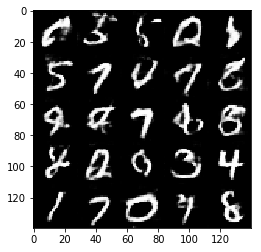

Epoch 2/2... Batch 24/32... Discriminator Loss: 1.2367... Generator Loss: 1.6498
Epoch 2/2... Batch 2/32... Discriminator Loss: 0.9276... Generator Loss: 1.2184
Epoch 2/2... Batch 12/32... Discriminator Loss: 0.8361... Generator Loss: 1.3630
Epoch 2/2... Batch 22/32... Discriminator Loss: 0.9529... Generator Loss: 1.6179
Epoch 2/2... Batch 0/32... Discriminator Loss: 0.8876... Generator Loss: 1.5427
Epoch 2/2... Batch 10/32... Discriminator Loss: 1.2306... Generator Loss: 0.8194
Epoch 2/2... Batch 20/32... Discriminator Loss: 1.0023... Generator Loss: 1.1834
Epoch 2/2... Batch 30/32... Discriminator Loss: 1.2491... Generator Loss: 0.6776
Epoch 2/2... Batch 8/32... Discriminator Loss: 1.0389... Generator Loss: 1.0855
Epoch 2/2... Batch 18/32... Discriminator Loss: 0.9247... Generator Loss: 1.0923


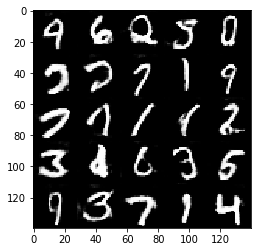

Epoch 2/2... Batch 28/32... Discriminator Loss: 1.1546... Generator Loss: 0.7106
Epoch 2/2... Batch 6/32... Discriminator Loss: 1.0443... Generator Loss: 0.8503
Epoch 2/2... Batch 16/32... Discriminator Loss: 1.0625... Generator Loss: 0.7673
Epoch 2/2... Batch 26/32... Discriminator Loss: 1.0474... Generator Loss: 0.9094
Epoch 2/2... Batch 4/32... Discriminator Loss: 1.4146... Generator Loss: 0.5130
Epoch 2/2... Batch 14/32... Discriminator Loss: 0.9372... Generator Loss: 1.1449
Epoch 2/2... Batch 24/32... Discriminator Loss: 0.8793... Generator Loss: 1.5167
Epoch 2/2... Batch 2/32... Discriminator Loss: 0.8583... Generator Loss: 1.4999
Epoch 2/2... Batch 12/32... Discriminator Loss: 1.0103... Generator Loss: 1.5330
Epoch 2/2... Batch 22/32... Discriminator Loss: 0.9632... Generator Loss: 1.6545


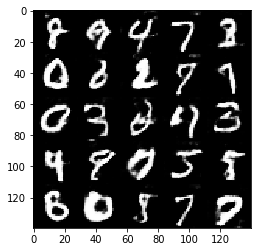

Epoch 2/2... Batch 0/32... Discriminator Loss: 1.0426... Generator Loss: 1.1086
Epoch 2/2... Batch 10/32... Discriminator Loss: 1.0071... Generator Loss: 2.3795
Epoch 2/2... Batch 20/32... Discriminator Loss: 1.9116... Generator Loss: 0.3231
Epoch 2/2... Batch 30/32... Discriminator Loss: 1.1362... Generator Loss: 1.1747
Epoch 2/2... Batch 8/32... Discriminator Loss: 1.0674... Generator Loss: 0.9313
Epoch 2/2... Batch 18/32... Discriminator Loss: 1.0219... Generator Loss: 1.4801
Epoch 2/2... Batch 28/32... Discriminator Loss: 1.0618... Generator Loss: 0.8607
Epoch 2/2... Batch 6/32... Discriminator Loss: 0.9611... Generator Loss: 1.0416
Epoch 2/2... Batch 16/32... Discriminator Loss: 1.0883... Generator Loss: 0.7921
Epoch 2/2... Batch 26/32... Discriminator Loss: 1.0506... Generator Loss: 0.9679


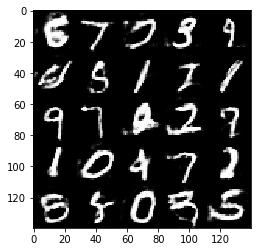

Epoch 2/2... Batch 4/32... Discriminator Loss: 0.9234... Generator Loss: 1.4869
Epoch 2/2... Batch 14/32... Discriminator Loss: 0.9345... Generator Loss: 1.2792
Epoch 2/2... Batch 24/32... Discriminator Loss: 0.9698... Generator Loss: 1.1061
Epoch 2/2... Batch 2/32... Discriminator Loss: 0.9880... Generator Loss: 1.1757
Epoch 2/2... Batch 12/32... Discriminator Loss: 1.0123... Generator Loss: 1.0240
Epoch 2/2... Batch 22/32... Discriminator Loss: 0.8556... Generator Loss: 1.4766
Epoch 2/2... Batch 0/32... Discriminator Loss: 1.0241... Generator Loss: 0.8983
Epoch 2/2... Batch 10/32... Discriminator Loss: 0.9541... Generator Loss: 1.0252
Epoch 2/2... Batch 20/32... Discriminator Loss: 1.0589... Generator Loss: 0.8083
Epoch 2/2... Batch 30/32... Discriminator Loss: 0.9270... Generator Loss: 1.2152


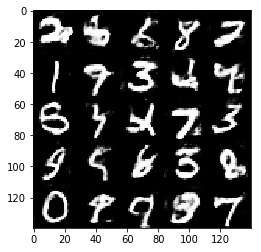

Epoch 2/2... Batch 8/32... Discriminator Loss: 1.0142... Generator Loss: 1.1368
Epoch 2/2... Batch 18/32... Discriminator Loss: 0.8907... Generator Loss: 1.1110
Epoch 2/2... Batch 28/32... Discriminator Loss: 1.1246... Generator Loss: 0.9250
Epoch 2/2... Batch 6/32... Discriminator Loss: 1.0303... Generator Loss: 0.9452
Epoch 2/2... Batch 16/32... Discriminator Loss: 0.8790... Generator Loss: 1.1883
Epoch 2/2... Batch 26/32... Discriminator Loss: 0.9590... Generator Loss: 1.3529
Epoch 2/2... Batch 4/32... Discriminator Loss: 0.9604... Generator Loss: 1.3738
Epoch 2/2... Batch 14/32... Discriminator Loss: 1.0605... Generator Loss: 0.9261
Epoch 2/2... Batch 24/32... Discriminator Loss: 0.9260... Generator Loss: 1.2045
Epoch 2/2... Batch 2/32... Discriminator Loss: 0.8323... Generator Loss: 1.5635


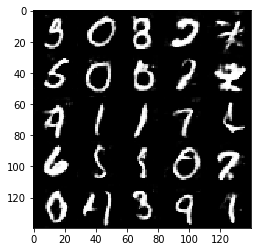

Epoch 2/2... Batch 12/32... Discriminator Loss: 0.9980... Generator Loss: 0.9571
Epoch 2/2... Batch 22/32... Discriminator Loss: 1.0059... Generator Loss: 1.1232
Epoch 2/2... Batch 0/32... Discriminator Loss: 0.9076... Generator Loss: 1.2971
Epoch 2/2... Batch 10/32... Discriminator Loss: 0.8714... Generator Loss: 1.3819
Epoch 2/2... Batch 20/32... Discriminator Loss: 0.9404... Generator Loss: 1.2612
Epoch 2/2... Batch 30/32... Discriminator Loss: 1.0266... Generator Loss: 1.0137
Epoch 2/2... Batch 8/32... Discriminator Loss: 1.0930... Generator Loss: 0.7540
Epoch 2/2... Batch 18/32... Discriminator Loss: 0.9965... Generator Loss: 1.1353
Epoch 2/2... Batch 28/32... Discriminator Loss: 1.0118... Generator Loss: 2.0543
Epoch 2/2... Batch 6/32... Discriminator Loss: 0.8252... Generator Loss: 1.4490


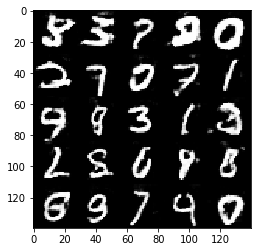

Epoch 2/2... Batch 16/32... Discriminator Loss: 0.8222... Generator Loss: 1.5072
Epoch 2/2... Batch 26/32... Discriminator Loss: 0.7772... Generator Loss: 1.9341
Epoch 2/2... Batch 4/32... Discriminator Loss: 0.8190... Generator Loss: 1.3252
Epoch 2/2... Batch 14/32... Discriminator Loss: 1.1513... Generator Loss: 0.8070
Epoch 2/2... Batch 24/32... Discriminator Loss: 0.9278... Generator Loss: 1.1848
Epoch 2/2... Batch 2/32... Discriminator Loss: 0.8493... Generator Loss: 1.6234
Epoch 2/2... Batch 12/32... Discriminator Loss: 0.8889... Generator Loss: 1.2259
Epoch 2/2... Batch 22/32... Discriminator Loss: 0.8344... Generator Loss: 1.2625
Epoch 2/2... Batch 0/32... Discriminator Loss: 1.0355... Generator Loss: 0.8993
Epoch 2/2... Batch 10/32... Discriminator Loss: 0.9342... Generator Loss: 1.9226


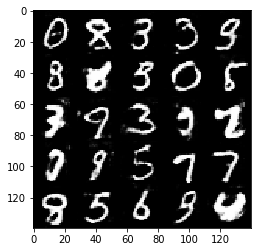

Epoch 2/2... Batch 20/32... Discriminator Loss: 0.9475... Generator Loss: 1.1085
Epoch 2/2... Batch 30/32... Discriminator Loss: 0.8666... Generator Loss: 1.3133
Epoch 2/2... Batch 8/32... Discriminator Loss: 1.0492... Generator Loss: 0.9355
Epoch 2/2... Batch 18/32... Discriminator Loss: 0.8841... Generator Loss: 1.1811
Epoch 2/2... Batch 28/32... Discriminator Loss: 0.7976... Generator Loss: 1.7219
Epoch 2/2... Batch 6/32... Discriminator Loss: 0.8276... Generator Loss: 1.2435
Epoch 2/2... Batch 16/32... Discriminator Loss: 0.7732... Generator Loss: 1.4241
Epoch 2/2... Batch 26/32... Discriminator Loss: 0.8517... Generator Loss: 1.7017
Epoch 2/2... Batch 4/32... Discriminator Loss: 3.3067... Generator Loss: 4.4521
Epoch 2/2... Batch 14/32... Discriminator Loss: 0.8234... Generator Loss: 1.4545


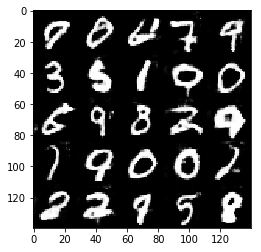

Epoch 2/2... Batch 24/32... Discriminator Loss: 0.8615... Generator Loss: 1.6506
Epoch 2/2... Batch 2/32... Discriminator Loss: 0.8872... Generator Loss: 1.2244
Epoch 2/2... Batch 12/32... Discriminator Loss: 0.9454... Generator Loss: 1.0061
Epoch 2/2... Batch 22/32... Discriminator Loss: 0.8516... Generator Loss: 1.5146
Epoch 2/2... Batch 0/32... Discriminator Loss: 0.8872... Generator Loss: 1.1153
Epoch 2/2... Batch 10/32... Discriminator Loss: 0.7718... Generator Loss: 1.4163
Epoch 2/2... Batch 20/32... Discriminator Loss: 1.2750... Generator Loss: 0.5912
Epoch 2/2... Batch 30/32... Discriminator Loss: 1.0437... Generator Loss: 0.8560
Epoch 2/2... Batch 8/32... Discriminator Loss: 0.9168... Generator Loss: 1.1412
Epoch 2/2... Batch 18/32... Discriminator Loss: 1.1114... Generator Loss: 1.7928


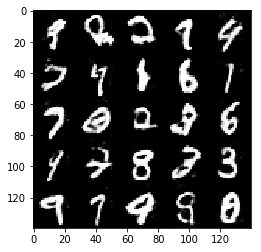

Epoch 2/2... Batch 28/32... Discriminator Loss: 0.7711... Generator Loss: 1.7795
Epoch 2/2... Batch 6/32... Discriminator Loss: 0.7962... Generator Loss: 1.6754
Epoch 2/2... Batch 16/32... Discriminator Loss: 0.8018... Generator Loss: 1.4277
Epoch 2/2... Batch 26/32... Discriminator Loss: 0.8107... Generator Loss: 1.4281
Epoch 2/2... Batch 4/32... Discriminator Loss: 1.0959... Generator Loss: 0.8688
Epoch 2/2... Batch 14/32... Discriminator Loss: 0.8750... Generator Loss: 1.4041
Epoch 2/2... Batch 24/32... Discriminator Loss: 0.8541... Generator Loss: 1.1908
Epoch 2/2... Batch 2/32... Discriminator Loss: 0.9718... Generator Loss: 1.0865
Epoch 2/2... Batch 12/32... Discriminator Loss: 0.8188... Generator Loss: 1.6414
Epoch 2/2... Batch 22/32... Discriminator Loss: 0.9753... Generator Loss: 1.0814


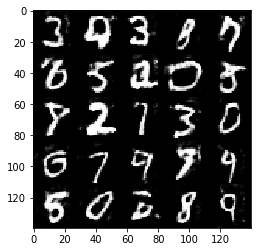

Epoch 2/2... Batch 0/32... Discriminator Loss: 1.5028... Generator Loss: 0.6269
Epoch 2/2... Batch 10/32... Discriminator Loss: 0.8475... Generator Loss: 1.4498
Epoch 2/2... Batch 20/32... Discriminator Loss: 0.8147... Generator Loss: 1.4256
Epoch 2/2... Batch 30/32... Discriminator Loss: 0.7651... Generator Loss: 1.7573
Epoch 2/2... Batch 8/32... Discriminator Loss: 0.7368... Generator Loss: 1.9497
Epoch 2/2... Batch 18/32... Discriminator Loss: 1.0255... Generator Loss: 1.0767
Epoch 2/2... Batch 28/32... Discriminator Loss: 0.7388... Generator Loss: 1.5086
Epoch 2/2... Batch 6/32... Discriminator Loss: 1.0484... Generator Loss: 0.8893
Epoch 2/2... Batch 16/32... Discriminator Loss: 0.8428... Generator Loss: 1.1104
Epoch 2/2... Batch 26/32... Discriminator Loss: 0.8963... Generator Loss: 1.0970


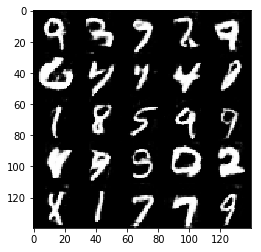

Epoch 2/2... Batch 4/32... Discriminator Loss: 0.9357... Generator Loss: 1.0952
Epoch 2/2... Batch 14/32... Discriminator Loss: 0.8058... Generator Loss: 1.3741
Epoch 2/2... Batch 24/32... Discriminator Loss: 0.8297... Generator Loss: 1.7596
Epoch 2/2... Batch 2/32... Discriminator Loss: 1.7369... Generator Loss: 2.2157
Epoch 2/2... Batch 12/32... Discriminator Loss: 0.8366... Generator Loss: 1.5961
Epoch 2/2... Batch 22/32... Discriminator Loss: 0.7622... Generator Loss: 1.4410
Epoch 2/2... Batch 0/32... Discriminator Loss: 0.9239... Generator Loss: 1.0006
Epoch 2/2... Batch 10/32... Discriminator Loss: 0.7471... Generator Loss: 1.7277
Epoch 2/2... Batch 20/32... Discriminator Loss: 0.8108... Generator Loss: 1.4295
Epoch 2/2... Batch 30/32... Discriminator Loss: 0.8348... Generator Loss: 1.2469


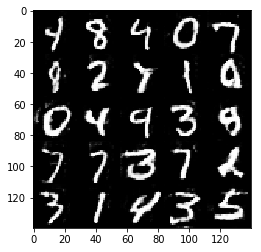

Epoch 2/2... Batch 8/32... Discriminator Loss: 0.8722... Generator Loss: 1.1742
Epoch 2/2... Batch 18/32... Discriminator Loss: 0.8745... Generator Loss: 1.4952
Epoch 2/2... Batch 28/32... Discriminator Loss: 0.7384... Generator Loss: 1.4134
Epoch 2/2... Batch 6/32... Discriminator Loss: 0.8052... Generator Loss: 2.1692
Epoch 2/2... Batch 16/32... Discriminator Loss: 0.8126... Generator Loss: 1.7097
Epoch 2/2... Batch 26/32... Discriminator Loss: 0.7442... Generator Loss: 1.6973
Epoch 2/2... Batch 4/32... Discriminator Loss: 0.8508... Generator Loss: 1.6110
Epoch 2/2... Batch 14/32... Discriminator Loss: 0.7432... Generator Loss: 1.7547
Epoch 2/2... Batch 24/32... Discriminator Loss: 1.0824... Generator Loss: 0.8604
Epoch 2/2... Batch 2/32... Discriminator Loss: 0.8297... Generator Loss: 1.2833


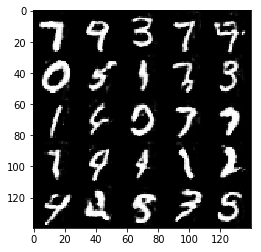

Epoch 2/2... Batch 12/32... Discriminator Loss: 0.7111... Generator Loss: 1.5448
Epoch 2/2... Batch 22/32... Discriminator Loss: 0.8033... Generator Loss: 1.5154
Epoch 2/2... Batch 0/32... Discriminator Loss: 1.0074... Generator Loss: 0.9852
Epoch 2/2... Batch 10/32... Discriminator Loss: 0.7881... Generator Loss: 1.5278
Epoch 2/2... Batch 20/32... Discriminator Loss: 0.8358... Generator Loss: 1.2059
Epoch 2/2... Batch 30/32... Discriminator Loss: 0.7620... Generator Loss: 1.5172
Epoch 2/2... Batch 8/32... Discriminator Loss: 0.7542... Generator Loss: 1.5676
Epoch 2/2... Batch 18/32... Discriminator Loss: 0.6944... Generator Loss: 1.5438
Epoch 2/2... Batch 28/32... Discriminator Loss: 0.9083... Generator Loss: 1.1878
Epoch 2/2... Batch 6/32... Discriminator Loss: 0.7917... Generator Loss: 1.8557


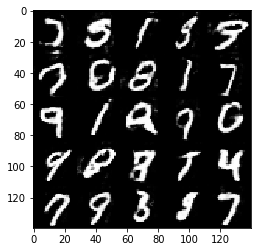

Epoch 2/2... Batch 16/32... Discriminator Loss: 1.0643... Generator Loss: 0.9740
Epoch 2/2... Batch 26/32... Discriminator Loss: 0.8159... Generator Loss: 1.4008
Epoch 2/2... Batch 4/32... Discriminator Loss: 2.9647... Generator Loss: 3.8748
Epoch 2/2... Batch 14/32... Discriminator Loss: 0.6977... Generator Loss: 1.5194
Epoch 2/2... Batch 24/32... Discriminator Loss: 0.7748... Generator Loss: 1.4347
Epoch 2/2... Batch 2/32... Discriminator Loss: 0.7031... Generator Loss: 1.5259
Epoch 2/2... Batch 12/32... Discriminator Loss: 0.7951... Generator Loss: 1.3439
Epoch 2/2... Batch 22/32... Discriminator Loss: 0.6556... Generator Loss: 2.0627
Epoch 2/2... Batch 0/32... Discriminator Loss: 0.8148... Generator Loss: 1.2884
Epoch 2/2... Batch 10/32... Discriminator Loss: 0.8122... Generator Loss: 1.4435


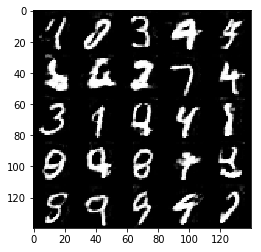

Epoch 2/2... Batch 20/32... Discriminator Loss: 0.7216... Generator Loss: 1.6536
Epoch 2/2... Batch 30/32... Discriminator Loss: 0.8377... Generator Loss: 1.2331
Epoch 2/2... Batch 8/32... Discriminator Loss: 0.8658... Generator Loss: 1.2209
Epoch 2/2... Batch 18/32... Discriminator Loss: 0.8596... Generator Loss: 1.9882
Epoch 2/2... Batch 28/32... Discriminator Loss: 0.7931... Generator Loss: 1.9132


In [18]:
batch_size = 32
z_dim = 100
learning_rate = 0.0005
beta1 = 0.3



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

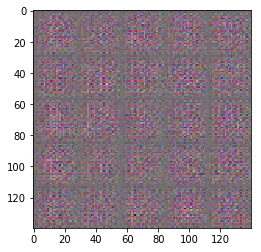

Epoch 1/1... Batch 0/32... Discriminator Loss: 1.3343... Generator Loss: 0.5883
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.1095... Generator Loss: 0.9025
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.1685... Generator Loss: 0.9789
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.8542... Generator Loss: 0.3337
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.2237... Generator Loss: 0.9273
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.1987... Generator Loss: 0.7823
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.1164... Generator Loss: 1.0114
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.1414... Generator Loss: 0.9259
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.1095... Generator Loss: 0.8701
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.2105... Generator Loss: 1.1178


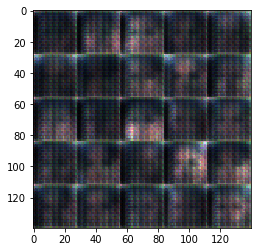

Epoch 1/1... Batch 4/32... Discriminator Loss: 1.3254... Generator Loss: 0.7316
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.2090... Generator Loss: 1.0019
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.2417... Generator Loss: 0.7801
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.2482... Generator Loss: 0.9395
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.3315... Generator Loss: 0.8836
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.2337... Generator Loss: 0.9190
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.2728... Generator Loss: 0.8856
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.2575... Generator Loss: 0.8169
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.2040... Generator Loss: 0.8379
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.3247... Generator Loss: 0.7372


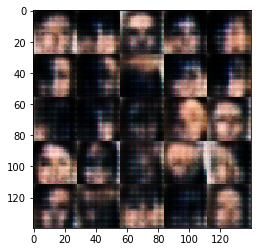

Epoch 1/1... Batch 8/32... Discriminator Loss: 1.3486... Generator Loss: 0.8311
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.2415... Generator Loss: 0.8126
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.3330... Generator Loss: 0.7804
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.2673... Generator Loss: 0.7607
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.2938... Generator Loss: 0.7166
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.2317... Generator Loss: 0.9843
Epoch 1/1... Batch 4/32... Discriminator Loss: 2.2212... Generator Loss: 2.2040
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.2019... Generator Loss: 0.8222
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.3236... Generator Loss: 0.7093
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.3643... Generator Loss: 0.8724


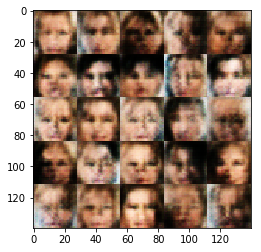

Epoch 1/1... Batch 12/32... Discriminator Loss: 1.3618... Generator Loss: 0.5842
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.2351... Generator Loss: 1.1129
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.3190... Generator Loss: 0.6932
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.3242... Generator Loss: 0.7579
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.2902... Generator Loss: 0.9064
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.3417... Generator Loss: 0.6133
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.2805... Generator Loss: 0.9907
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.3426... Generator Loss: 0.7329
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.5454... Generator Loss: 0.5345
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.2380... Generator Loss: 0.9258


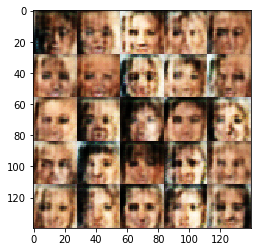

Epoch 1/1... Batch 16/32... Discriminator Loss: 1.4167... Generator Loss: 0.8206
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.3374... Generator Loss: 0.8901
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.3748... Generator Loss: 0.9062
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.3465... Generator Loss: 0.9858
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.3582... Generator Loss: 0.8486
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.2608... Generator Loss: 0.8211
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.3450... Generator Loss: 0.7830
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.4453... Generator Loss: 1.1001
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.3762... Generator Loss: 0.6621
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.3683... Generator Loss: 0.9965


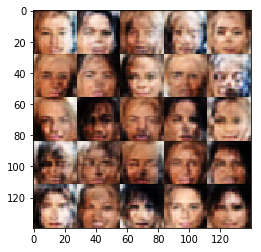

Epoch 1/1... Batch 20/32... Discriminator Loss: 1.2758... Generator Loss: 0.8667
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.3870... Generator Loss: 0.7483
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.3365... Generator Loss: 0.8188
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.3489... Generator Loss: 0.9029
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.3791... Generator Loss: 0.9999
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.3029... Generator Loss: 0.7598
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.2916... Generator Loss: 0.7835
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.3613... Generator Loss: 0.9875
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.2808... Generator Loss: 0.7572
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.2661... Generator Loss: 0.8738


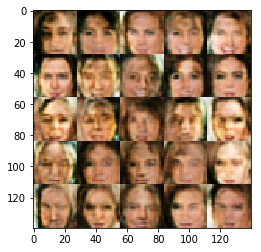

Epoch 1/1... Batch 24/32... Discriminator Loss: 1.3247... Generator Loss: 0.6637
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.3110... Generator Loss: 0.6812
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.3207... Generator Loss: 0.7504
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.3563... Generator Loss: 0.7332
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.3579... Generator Loss: 0.7125
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.4656... Generator Loss: 0.5845
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.3367... Generator Loss: 0.8911
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.2887... Generator Loss: 0.6789
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.4032... Generator Loss: 0.9036
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.2982... Generator Loss: 0.8167


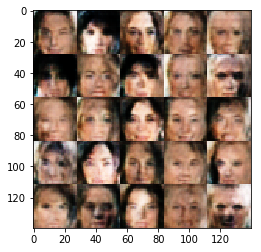

Epoch 1/1... Batch 28/32... Discriminator Loss: 1.3412... Generator Loss: 0.7973
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.3067... Generator Loss: 0.7642
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.3174... Generator Loss: 0.7671
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.3675... Generator Loss: 0.6397
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.4032... Generator Loss: 0.7376
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.2955... Generator Loss: 0.8555
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.3234... Generator Loss: 0.8179
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.3080... Generator Loss: 0.8067
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.4494... Generator Loss: 0.6350
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.3738... Generator Loss: 0.9369


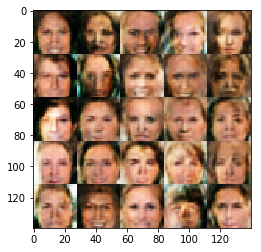

Epoch 1/1... Batch 0/32... Discriminator Loss: 1.3910... Generator Loss: 0.8059
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.3413... Generator Loss: 0.9284
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.2836... Generator Loss: 0.7918
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.3053... Generator Loss: 0.7759
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.3296... Generator Loss: 0.8541
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.3906... Generator Loss: 0.7152
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.3717... Generator Loss: 0.8364
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.4355... Generator Loss: 0.7114
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.3326... Generator Loss: 0.7844
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.3564... Generator Loss: 1.0163


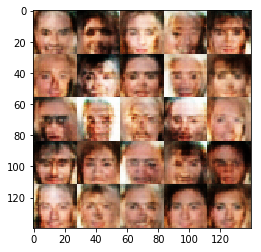

Epoch 1/1... Batch 4/32... Discriminator Loss: 1.3267... Generator Loss: 0.7538
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.3631... Generator Loss: 0.7257
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.3300... Generator Loss: 0.9329
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.3589... Generator Loss: 0.7958
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.4022... Generator Loss: 0.7435
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.3550... Generator Loss: 0.6937
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.6195... Generator Loss: 0.9858
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.3042... Generator Loss: 0.7474
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.3957... Generator Loss: 0.9641
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.2571... Generator Loss: 0.7560


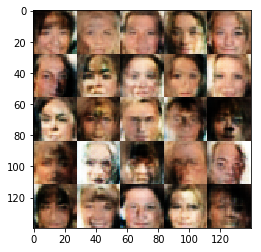

Epoch 1/1... Batch 8/32... Discriminator Loss: 1.3430... Generator Loss: 0.7793
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.3584... Generator Loss: 0.7991
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.3528... Generator Loss: 1.0618
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.3381... Generator Loss: 0.7339
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.4151... Generator Loss: 0.6745
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.3090... Generator Loss: 0.7165
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.3395... Generator Loss: 0.7196
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.4135... Generator Loss: 0.8023
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.3503... Generator Loss: 0.8257
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.3774... Generator Loss: 0.8285


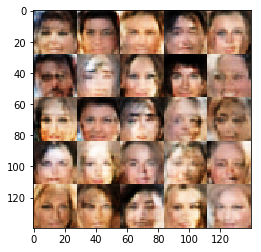

Epoch 1/1... Batch 12/32... Discriminator Loss: 1.3031... Generator Loss: 1.1330
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.3362... Generator Loss: 0.7868
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.3451... Generator Loss: 0.9011
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.3676... Generator Loss: 0.7548
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.3402... Generator Loss: 0.5667
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.3169... Generator Loss: 0.7520
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.5836... Generator Loss: 0.5118
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.4446... Generator Loss: 0.7348
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.3051... Generator Loss: 0.7410
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.3149... Generator Loss: 0.8637


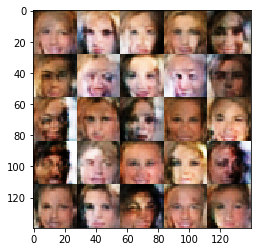

Epoch 1/1... Batch 16/32... Discriminator Loss: 1.3475... Generator Loss: 0.7412
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.3418... Generator Loss: 0.7686
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.3339... Generator Loss: 0.8512
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.3729... Generator Loss: 0.6586
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.3247... Generator Loss: 0.8097
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.3786... Generator Loss: 0.7149
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.2852... Generator Loss: 0.7585
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.3580... Generator Loss: 0.6847
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.3688... Generator Loss: 0.8162
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.2741... Generator Loss: 0.7419


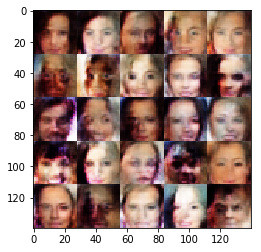

Epoch 1/1... Batch 20/32... Discriminator Loss: 1.3405... Generator Loss: 0.8112
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.4155... Generator Loss: 0.6882
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.5679... Generator Loss: 0.4540
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.3475... Generator Loss: 0.8254
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.2863... Generator Loss: 0.8383
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.3876... Generator Loss: 0.6876
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.4782... Generator Loss: 1.4584
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.3383... Generator Loss: 0.7044
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.2834... Generator Loss: 0.7783
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.3509... Generator Loss: 0.9111


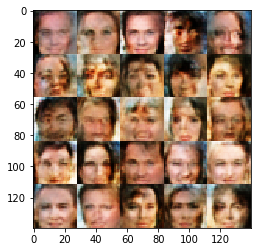

Epoch 1/1... Batch 24/32... Discriminator Loss: 1.4067... Generator Loss: 0.7058
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.3383... Generator Loss: 0.7183
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.3071... Generator Loss: 0.9109
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.3196... Generator Loss: 0.8874
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.3769... Generator Loss: 0.7627
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.4833... Generator Loss: 0.5519
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.3552... Generator Loss: 0.7143
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.3430... Generator Loss: 0.7095
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.1918... Generator Loss: 0.8933
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.3778... Generator Loss: 0.8210


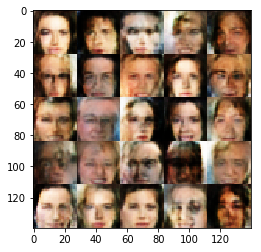

Epoch 1/1... Batch 28/32... Discriminator Loss: 1.3280... Generator Loss: 0.7451
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.3932... Generator Loss: 0.7314
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.3491... Generator Loss: 0.7036
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.5683... Generator Loss: 1.4479
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.2580... Generator Loss: 0.8136
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.3394... Generator Loss: 0.6414
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.3200... Generator Loss: 0.7715
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.3186... Generator Loss: 0.7248
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.3889... Generator Loss: 0.7333
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.3266... Generator Loss: 0.7000


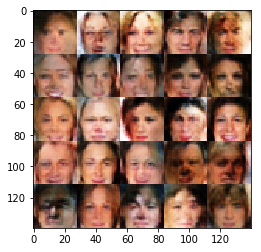

Epoch 1/1... Batch 0/32... Discriminator Loss: 1.2461... Generator Loss: 0.7978
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.3398... Generator Loss: 0.7964
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.2958... Generator Loss: 0.7995
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.3395... Generator Loss: 0.8512
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.2671... Generator Loss: 0.8896
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.4356... Generator Loss: 0.6337
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.2613... Generator Loss: 0.8047
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.4238... Generator Loss: 0.5987
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.2675... Generator Loss: 0.9218
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.3809... Generator Loss: 0.7862


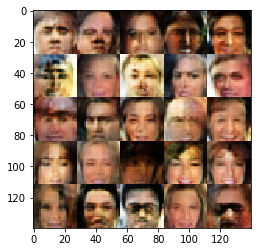

Epoch 1/1... Batch 4/32... Discriminator Loss: 1.4118... Generator Loss: 0.5949
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.3626... Generator Loss: 0.7676
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.1962... Generator Loss: 1.0052
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.4228... Generator Loss: 0.6146
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.3645... Generator Loss: 0.6879
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.3753... Generator Loss: 0.7255
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.3439... Generator Loss: 0.6740
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.3438... Generator Loss: 0.8650
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.3100... Generator Loss: 0.7243
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.5452... Generator Loss: 0.5032


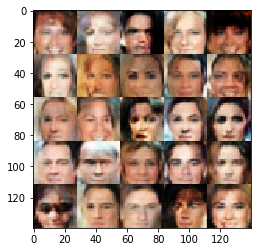

Epoch 1/1... Batch 8/32... Discriminator Loss: 1.3741... Generator Loss: 0.6256
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.2786... Generator Loss: 0.8114
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.4824... Generator Loss: 0.5997
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.4482... Generator Loss: 0.5656
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.3225... Generator Loss: 0.9999
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.4376... Generator Loss: 0.6347
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.2513... Generator Loss: 0.7510
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.2811... Generator Loss: 0.8713
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.2925... Generator Loss: 1.0272
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.4053... Generator Loss: 0.8456


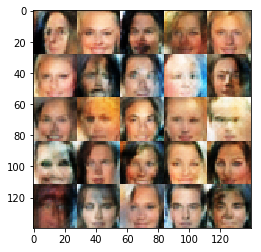

Epoch 1/1... Batch 12/32... Discriminator Loss: 1.3677... Generator Loss: 0.8504
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.5919... Generator Loss: 1.3744
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.2556... Generator Loss: 0.8540
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.3431... Generator Loss: 0.8447
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.3408... Generator Loss: 0.8005
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.2930... Generator Loss: 0.8225
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.3843... Generator Loss: 0.8306
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.2922... Generator Loss: 0.9002
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.3218... Generator Loss: 0.6665
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.3077... Generator Loss: 0.7322


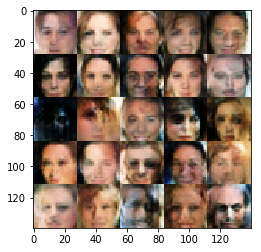

Epoch 1/1... Batch 16/32... Discriminator Loss: 1.3180... Generator Loss: 1.0416
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.3496... Generator Loss: 0.6444
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.3701... Generator Loss: 0.7670
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.3165... Generator Loss: 0.8520
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.3268... Generator Loss: 0.8089
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.2932... Generator Loss: 0.7820
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.3444... Generator Loss: 0.9453
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.3237... Generator Loss: 0.6422
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.4341... Generator Loss: 0.5736
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.2757... Generator Loss: 0.7421


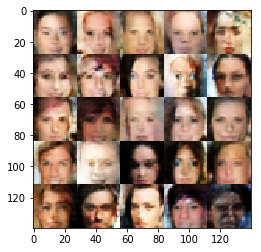

Epoch 1/1... Batch 20/32... Discriminator Loss: 1.2632... Generator Loss: 0.8713
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.3514... Generator Loss: 1.1550
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.3156... Generator Loss: 0.7166
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.3748... Generator Loss: 0.6678
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.3568... Generator Loss: 0.7014
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.4514... Generator Loss: 0.6598
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.4201... Generator Loss: 0.5843
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.5213... Generator Loss: 0.9568
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.2715... Generator Loss: 0.9442
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.2768... Generator Loss: 1.0255


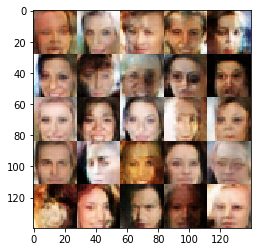

Epoch 1/1... Batch 24/32... Discriminator Loss: 1.2900... Generator Loss: 1.0753
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.3689... Generator Loss: 0.5808
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.3293... Generator Loss: 0.7153
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.4524... Generator Loss: 0.6213
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.2206... Generator Loss: 0.9527
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.3680... Generator Loss: 0.7211
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.4187... Generator Loss: 1.3959
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.3924... Generator Loss: 0.6269
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.3380... Generator Loss: 0.6386
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.3221... Generator Loss: 0.8778


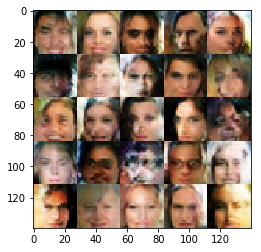

Epoch 1/1... Batch 28/32... Discriminator Loss: 1.4010... Generator Loss: 0.6189
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.2777... Generator Loss: 0.7368
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.3128... Generator Loss: 0.7389
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.2951... Generator Loss: 0.8352
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.2972... Generator Loss: 0.8484
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.3487... Generator Loss: 0.7629
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.2765... Generator Loss: 0.8885
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.3797... Generator Loss: 0.6457
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.3908... Generator Loss: 0.5950
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.2554... Generator Loss: 1.0857


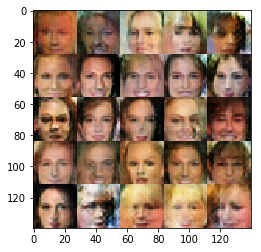

Epoch 1/1... Batch 0/32... Discriminator Loss: 1.3423... Generator Loss: 0.8036
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.2968... Generator Loss: 0.7638
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.2758... Generator Loss: 0.9266
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.2496... Generator Loss: 0.9659
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.3171... Generator Loss: 0.8168
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.3335... Generator Loss: 0.7980
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.3504... Generator Loss: 0.7293
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.2874... Generator Loss: 0.8958
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.3295... Generator Loss: 1.0418
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.3725... Generator Loss: 0.5942


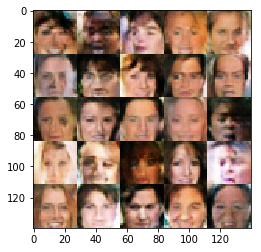

Epoch 1/1... Batch 4/32... Discriminator Loss: 1.3164... Generator Loss: 0.7017
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.1866... Generator Loss: 1.0872
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.3244... Generator Loss: 0.6946
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.3312... Generator Loss: 1.0120
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.3193... Generator Loss: 0.8215
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.3574... Generator Loss: 0.6474
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.2269... Generator Loss: 1.0461
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.3129... Generator Loss: 0.7438
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.2787... Generator Loss: 0.9994
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.3299... Generator Loss: 0.9321


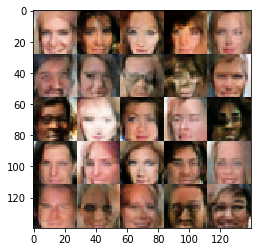

Epoch 1/1... Batch 8/32... Discriminator Loss: 1.2666... Generator Loss: 0.8102
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.3406... Generator Loss: 0.9019
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.2781... Generator Loss: 0.8006
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.2422... Generator Loss: 0.8123
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.3750... Generator Loss: 0.7323
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.2101... Generator Loss: 0.9751
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.3199... Generator Loss: 0.7962
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.2802... Generator Loss: 0.6832
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.4134... Generator Loss: 0.5656
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.2255... Generator Loss: 0.8800


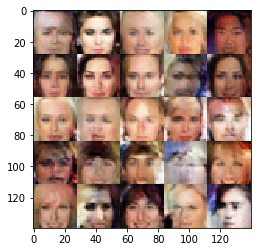

Epoch 1/1... Batch 12/32... Discriminator Loss: 1.2884... Generator Loss: 0.7545
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.2004... Generator Loss: 1.2031
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.2441... Generator Loss: 0.9034
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.3432... Generator Loss: 0.6738
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.3210... Generator Loss: 0.7224
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.3321... Generator Loss: 0.6782
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.2691... Generator Loss: 0.7920
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.2122... Generator Loss: 1.1504
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.2378... Generator Loss: 0.8328
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.2107... Generator Loss: 0.8702


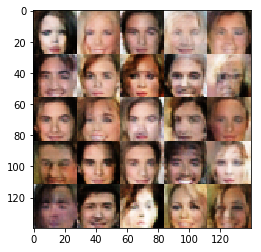

Epoch 1/1... Batch 16/32... Discriminator Loss: 1.4314... Generator Loss: 0.5374
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.3196... Generator Loss: 0.9954
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.3026... Generator Loss: 0.7070
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.5159... Generator Loss: 0.6047
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.3560... Generator Loss: 0.7474
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.2520... Generator Loss: 0.9621
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.2996... Generator Loss: 0.7742
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.3561... Generator Loss: 0.7848
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.3667... Generator Loss: 0.7411
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.1821... Generator Loss: 0.8578


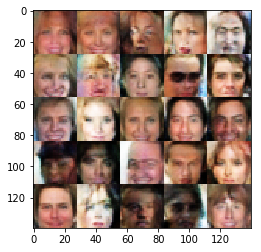

Epoch 1/1... Batch 20/32... Discriminator Loss: 1.1646... Generator Loss: 0.9422
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.2355... Generator Loss: 0.9578
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.2353... Generator Loss: 1.1751
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.2934... Generator Loss: 0.7410
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.3039... Generator Loss: 0.7294
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.2697... Generator Loss: 0.7294
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.2588... Generator Loss: 0.8027
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.3125... Generator Loss: 0.7128
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.3270... Generator Loss: 0.6399
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.4032... Generator Loss: 0.5273


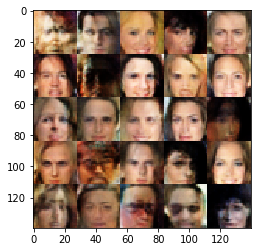

Epoch 1/1... Batch 24/32... Discriminator Loss: 1.2262... Generator Loss: 0.8380
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.4639... Generator Loss: 0.6215
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.2567... Generator Loss: 0.8232
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.2604... Generator Loss: 0.7298
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.3021... Generator Loss: 0.6559
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.3650... Generator Loss: 0.6424
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.2275... Generator Loss: 1.1050
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.4323... Generator Loss: 0.6296
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.2234... Generator Loss: 0.8341
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.3176... Generator Loss: 0.6954


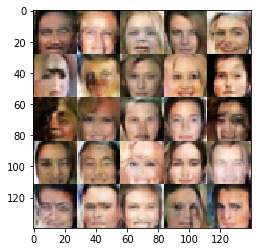

Epoch 1/1... Batch 28/32... Discriminator Loss: 1.2993... Generator Loss: 0.7464
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.3192... Generator Loss: 0.7697
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.2735... Generator Loss: 1.1341
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.2992... Generator Loss: 0.6827
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.2550... Generator Loss: 0.7672
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.2018... Generator Loss: 0.7805
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.2968... Generator Loss: 1.3191
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.2611... Generator Loss: 1.0003
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.1779... Generator Loss: 0.9558
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.2718... Generator Loss: 1.0638


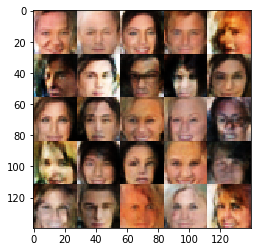

Epoch 1/1... Batch 0/32... Discriminator Loss: 1.3095... Generator Loss: 0.7762
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.3434... Generator Loss: 0.5820
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.4542... Generator Loss: 0.5219
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.2787... Generator Loss: 0.8312
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.3766... Generator Loss: 0.7394
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.2718... Generator Loss: 0.9632
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.4651... Generator Loss: 1.1931
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.3402... Generator Loss: 0.6914
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.3388... Generator Loss: 0.6733
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.2545... Generator Loss: 0.8705


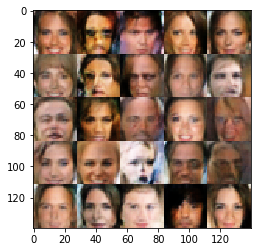

Epoch 1/1... Batch 4/32... Discriminator Loss: 1.2188... Generator Loss: 0.8283
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.2420... Generator Loss: 0.8805
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.3379... Generator Loss: 1.1333
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.4153... Generator Loss: 0.5556
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.4019... Generator Loss: 0.5274
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.2594... Generator Loss: 0.7944
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.3242... Generator Loss: 0.7208
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.2439... Generator Loss: 1.0125
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.2774... Generator Loss: 0.6616
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.2184... Generator Loss: 0.7717


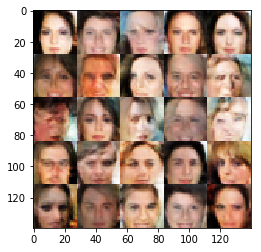

Epoch 1/1... Batch 8/32... Discriminator Loss: 1.2381... Generator Loss: 0.8252
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.2505... Generator Loss: 0.8933
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.3586... Generator Loss: 0.7189
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.2832... Generator Loss: 0.6353
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.2145... Generator Loss: 1.0229
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.3355... Generator Loss: 0.9336
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.4735... Generator Loss: 0.5100
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.3192... Generator Loss: 0.6963
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.3748... Generator Loss: 0.5336
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.2393... Generator Loss: 0.6958


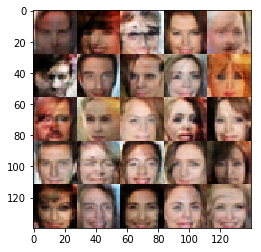

Epoch 1/1... Batch 12/32... Discriminator Loss: 1.3582... Generator Loss: 0.6856
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.1475... Generator Loss: 0.9458
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.2701... Generator Loss: 0.8463
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.2852... Generator Loss: 0.9336
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.2684... Generator Loss: 0.8130
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.3357... Generator Loss: 0.6629
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.4273... Generator Loss: 0.5464
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.1907... Generator Loss: 0.8799
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.4018... Generator Loss: 0.6787
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.6603... Generator Loss: 0.4203


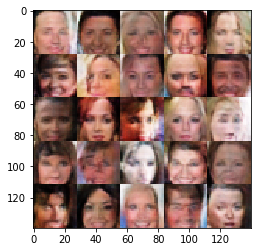

Epoch 1/1... Batch 16/32... Discriminator Loss: 1.2767... Generator Loss: 0.7282
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.2218... Generator Loss: 1.2669
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.2070... Generator Loss: 0.8123
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.3914... Generator Loss: 0.6219
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.2293... Generator Loss: 0.7369
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.2473... Generator Loss: 0.7583
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.2922... Generator Loss: 0.9264
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.2529... Generator Loss: 0.7841
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.2218... Generator Loss: 0.7397
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.4763... Generator Loss: 0.5867


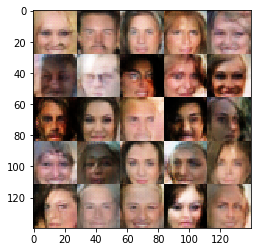

Epoch 1/1... Batch 20/32... Discriminator Loss: 1.5628... Generator Loss: 1.3792
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.2292... Generator Loss: 0.8400
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.2676... Generator Loss: 0.8327
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.2802... Generator Loss: 0.9282
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.2369... Generator Loss: 0.8544
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.2647... Generator Loss: 0.7921
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.2212... Generator Loss: 0.9212
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.2769... Generator Loss: 0.6635
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.2057... Generator Loss: 0.7344
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.2063... Generator Loss: 0.8633


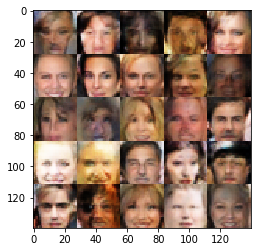

Epoch 1/1... Batch 24/32... Discriminator Loss: 1.1681... Generator Loss: 0.9727
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.2738... Generator Loss: 0.8511
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.2602... Generator Loss: 0.7690
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.4257... Generator Loss: 0.5336
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.2805... Generator Loss: 0.7286
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.2555... Generator Loss: 0.8484
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.2785... Generator Loss: 0.6643
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.3053... Generator Loss: 0.7673
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.2992... Generator Loss: 0.5972
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.3054... Generator Loss: 0.7056


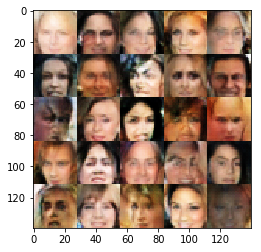

Epoch 1/1... Batch 28/32... Discriminator Loss: 1.3096... Generator Loss: 0.6293
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.3994... Generator Loss: 1.2812
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.2809... Generator Loss: 0.7326
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.3012... Generator Loss: 0.7359
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.1852... Generator Loss: 0.8757
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.1585... Generator Loss: 1.1233
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.3054... Generator Loss: 0.6284
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.2811... Generator Loss: 0.6888
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.3247... Generator Loss: 0.7098
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.2546... Generator Loss: 0.6667


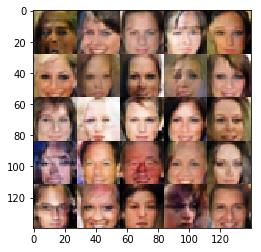

Epoch 1/1... Batch 0/32... Discriminator Loss: 1.4093... Generator Loss: 0.5076
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.3352... Generator Loss: 0.7171
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.3010... Generator Loss: 0.7416
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.3357... Generator Loss: 0.6858
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.2247... Generator Loss: 0.8431
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.2890... Generator Loss: 0.6832
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.2636... Generator Loss: 0.7366
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.3001... Generator Loss: 0.6143
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.2855... Generator Loss: 0.6693
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.4626... Generator Loss: 0.4719


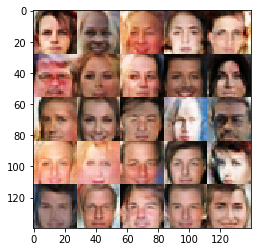

Epoch 1/1... Batch 4/32... Discriminator Loss: 1.3198... Generator Loss: 0.6873
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.2680... Generator Loss: 0.6577
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.3061... Generator Loss: 0.7711
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.3976... Generator Loss: 0.5638
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.2547... Generator Loss: 0.7219
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.2796... Generator Loss: 0.9024
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.2044... Generator Loss: 0.9094
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.3162... Generator Loss: 0.9376
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.2313... Generator Loss: 0.9564
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.2690... Generator Loss: 0.8127


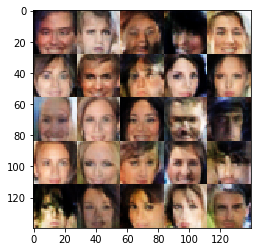

Epoch 1/1... Batch 8/32... Discriminator Loss: 1.3142... Generator Loss: 1.4345
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.3589... Generator Loss: 0.6104
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.1688... Generator Loss: 0.8765
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.2819... Generator Loss: 0.7639
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.3396... Generator Loss: 0.5918
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.3272... Generator Loss: 0.7716
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.0618... Generator Loss: 1.1415
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.3433... Generator Loss: 0.6410
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.0983... Generator Loss: 0.9501
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.1677... Generator Loss: 0.7600


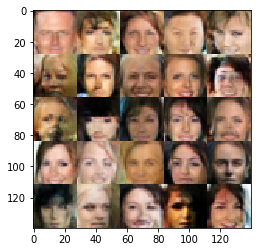

Epoch 1/1... Batch 12/32... Discriminator Loss: 1.4219... Generator Loss: 0.5555
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.2627... Generator Loss: 0.9232
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.1603... Generator Loss: 0.9847
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.2745... Generator Loss: 0.6521
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.2530... Generator Loss: 0.7432
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.8262... Generator Loss: 0.3685
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.4024... Generator Loss: 0.6100
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.2404... Generator Loss: 0.8282
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.2428... Generator Loss: 0.7422
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.3097... Generator Loss: 0.7308


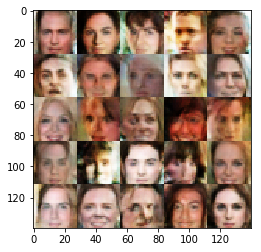

Epoch 1/1... Batch 16/32... Discriminator Loss: 1.2180... Generator Loss: 0.7776
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.2381... Generator Loss: 0.9265
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.2983... Generator Loss: 0.8121
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.2107... Generator Loss: 0.8508
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.2882... Generator Loss: 0.7609
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.1789... Generator Loss: 1.1761
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.2046... Generator Loss: 0.9586
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.2630... Generator Loss: 0.7632
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.1658... Generator Loss: 0.8360
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.2728... Generator Loss: 0.9042


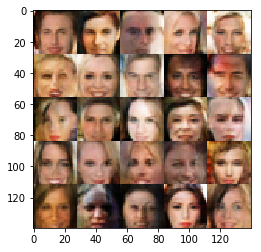

Epoch 1/1... Batch 20/32... Discriminator Loss: 1.1493... Generator Loss: 0.9703
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.3104... Generator Loss: 0.6468
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.2325... Generator Loss: 0.8102
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.3417... Generator Loss: 0.6115
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.2279... Generator Loss: 0.7979
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.3020... Generator Loss: 0.6736
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.2205... Generator Loss: 0.8074
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.2954... Generator Loss: 0.7321
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.2537... Generator Loss: 0.7469
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.1603... Generator Loss: 0.9075


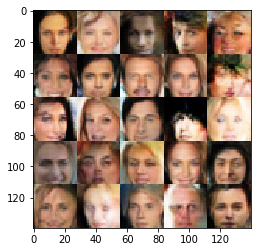

Epoch 1/1... Batch 24/32... Discriminator Loss: 1.1942... Generator Loss: 1.0565
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.1995... Generator Loss: 0.8440
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.2026... Generator Loss: 0.8344
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.2018... Generator Loss: 0.8017
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.1874... Generator Loss: 0.9491
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.2708... Generator Loss: 0.8067
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.2598... Generator Loss: 0.6666
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.2975... Generator Loss: 0.6026
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.1444... Generator Loss: 0.8647
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.1624... Generator Loss: 0.9936


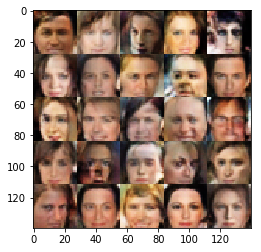

Epoch 1/1... Batch 28/32... Discriminator Loss: 1.1830... Generator Loss: 0.7788
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.1986... Generator Loss: 1.0185
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.1545... Generator Loss: 1.0193
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.2270... Generator Loss: 0.7596
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.2748... Generator Loss: 0.9041
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.3590... Generator Loss: 1.4586
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.3386... Generator Loss: 0.7009
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.2488... Generator Loss: 0.8943
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.1353... Generator Loss: 0.9330
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.2757... Generator Loss: 1.1091


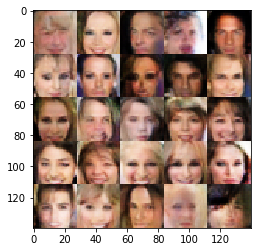

Epoch 1/1... Batch 0/32... Discriminator Loss: 1.2197... Generator Loss: 0.9937
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.1897... Generator Loss: 0.9550
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.1811... Generator Loss: 1.1472
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.1675... Generator Loss: 0.9769
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.2510... Generator Loss: 0.8106
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.2633... Generator Loss: 0.8256
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.3006... Generator Loss: 0.6924
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.2638... Generator Loss: 0.9801
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.2811... Generator Loss: 0.6830
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.1636... Generator Loss: 0.9200


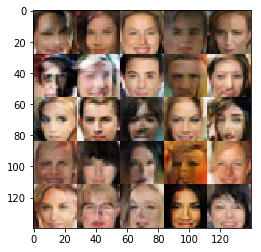

Epoch 1/1... Batch 4/32... Discriminator Loss: 1.2474... Generator Loss: 1.3313
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.2456... Generator Loss: 1.1503
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.2028... Generator Loss: 0.7877
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.2234... Generator Loss: 0.7331
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.2365... Generator Loss: 0.9119
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.2814... Generator Loss: 0.7960
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.2502... Generator Loss: 0.7048
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.1268... Generator Loss: 1.0262
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.2199... Generator Loss: 0.8422
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.2314... Generator Loss: 1.1887


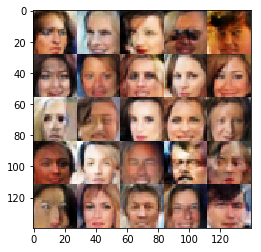

Epoch 1/1... Batch 8/32... Discriminator Loss: 1.5474... Generator Loss: 0.4365
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.2266... Generator Loss: 0.8471
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.2878... Generator Loss: 0.6878
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.2485... Generator Loss: 0.7799
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.2913... Generator Loss: 0.6385
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.2063... Generator Loss: 0.9264
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.1571... Generator Loss: 1.0353
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.1604... Generator Loss: 0.8786
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.2124... Generator Loss: 0.7890
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.1650... Generator Loss: 0.8539


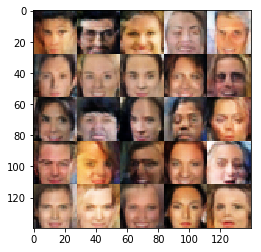

Epoch 1/1... Batch 12/32... Discriminator Loss: 1.2889... Generator Loss: 0.9808
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.1964... Generator Loss: 0.9029
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.2954... Generator Loss: 0.6542
Epoch 1/1... Batch 10/32... Discriminator Loss: 2.1472... Generator Loss: 2.0334
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.2463... Generator Loss: 0.8572
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.2497... Generator Loss: 0.7272
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.2109... Generator Loss: 0.8453
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.3226... Generator Loss: 0.6738
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.3184... Generator Loss: 0.8291
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.2383... Generator Loss: 0.9189


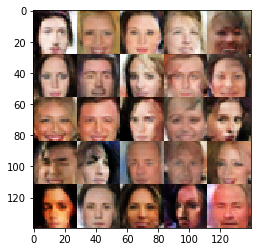

Epoch 1/1... Batch 16/32... Discriminator Loss: 1.2110... Generator Loss: 0.8646
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.2681... Generator Loss: 1.1718
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.4295... Generator Loss: 1.6605
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.2482... Generator Loss: 0.7986
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.1855... Generator Loss: 0.8750
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.3522... Generator Loss: 0.7377
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.1692... Generator Loss: 0.9962
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.2243... Generator Loss: 0.9063
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.2731... Generator Loss: 0.6334
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.3574... Generator Loss: 0.5770


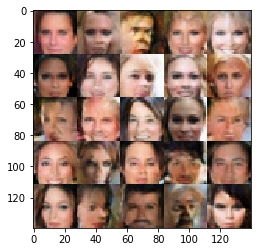

Epoch 1/1... Batch 20/32... Discriminator Loss: 1.2590... Generator Loss: 0.7179
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.2077... Generator Loss: 1.0786
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.3185... Generator Loss: 0.6610
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.3511... Generator Loss: 1.4704
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.2219... Generator Loss: 0.7834
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.2227... Generator Loss: 1.0347
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.2364... Generator Loss: 0.8938
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.2108... Generator Loss: 0.7879
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.1148... Generator Loss: 0.9177
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.2086... Generator Loss: 0.7309


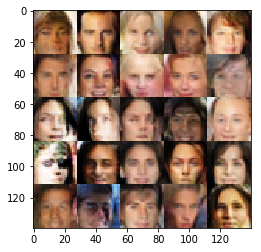

Epoch 1/1... Batch 24/32... Discriminator Loss: 1.2044... Generator Loss: 1.2057
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.3784... Generator Loss: 0.6150
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.1804... Generator Loss: 0.7902
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.1645... Generator Loss: 0.7757
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.2210... Generator Loss: 0.6887
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.2141... Generator Loss: 0.7614
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.2002... Generator Loss: 0.7604
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.4152... Generator Loss: 0.5243
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.1621... Generator Loss: 0.8578
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.2769... Generator Loss: 0.8799


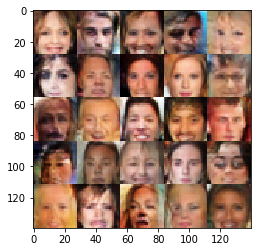

Epoch 1/1... Batch 28/32... Discriminator Loss: 1.2642... Generator Loss: 0.7859
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.2817... Generator Loss: 1.3230
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.1290... Generator Loss: 0.9627
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.2121... Generator Loss: 1.0101
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.2110... Generator Loss: 1.0054
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.1878... Generator Loss: 1.1541
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.2340... Generator Loss: 0.6952
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.1650... Generator Loss: 0.8029
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.3391... Generator Loss: 0.5744
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.2007... Generator Loss: 0.7456


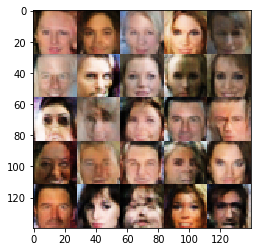

Epoch 1/1... Batch 0/32... Discriminator Loss: 1.1724... Generator Loss: 1.2533
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.3746... Generator Loss: 0.5704
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.1940... Generator Loss: 0.8519
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.2404... Generator Loss: 1.0926
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.1338... Generator Loss: 1.3679
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.3595... Generator Loss: 0.6931
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.1485... Generator Loss: 0.8258
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.2577... Generator Loss: 0.8440
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.2699... Generator Loss: 0.7110
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.3215... Generator Loss: 0.6038


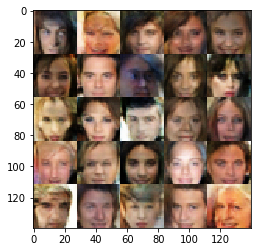

Epoch 1/1... Batch 4/32... Discriminator Loss: 1.1743... Generator Loss: 1.0965
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.2988... Generator Loss: 0.6203
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.2239... Generator Loss: 0.8485
Epoch 1/1... Batch 2/32... Discriminator Loss: 2.1092... Generator Loss: 0.2803
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.2290... Generator Loss: 0.8433
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.2349... Generator Loss: 0.7009
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.3575... Generator Loss: 0.6103
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.0969... Generator Loss: 1.0072
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.2587... Generator Loss: 0.7106
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.2435... Generator Loss: 0.7675


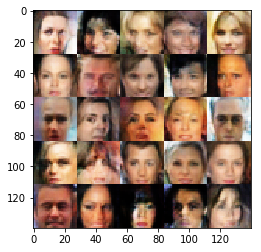

Epoch 1/1... Batch 8/32... Discriminator Loss: 1.2582... Generator Loss: 1.1106
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.1962... Generator Loss: 1.0047
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.1405... Generator Loss: 1.1197
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.2616... Generator Loss: 0.8996
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.2103... Generator Loss: 0.9410
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.1240... Generator Loss: 1.0111
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.2320... Generator Loss: 1.1407
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.1648... Generator Loss: 1.3730
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.2332... Generator Loss: 0.6614
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.2400... Generator Loss: 0.9677


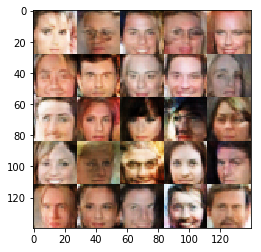

Epoch 1/1... Batch 12/32... Discriminator Loss: 1.1438... Generator Loss: 0.8270
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.1193... Generator Loss: 0.9571
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.1447... Generator Loss: 0.8925
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.1621... Generator Loss: 1.0372
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.1893... Generator Loss: 1.1370
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.2102... Generator Loss: 1.0406
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.2488... Generator Loss: 0.6929
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.1636... Generator Loss: 0.8364
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.3516... Generator Loss: 0.6205
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.2099... Generator Loss: 0.6952


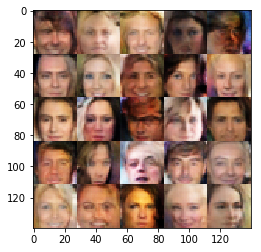

Epoch 1/1... Batch 16/32... Discriminator Loss: 1.1657... Generator Loss: 0.7035
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.2082... Generator Loss: 0.9039
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.2403... Generator Loss: 1.0904
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.2132... Generator Loss: 0.8643
Epoch 1/1... Batch 24/32... Discriminator Loss: 1.0939... Generator Loss: 1.2898
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.3300... Generator Loss: 0.5621
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.2353... Generator Loss: 0.7270
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.2198... Generator Loss: 0.7820
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.1490... Generator Loss: 1.0355
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.0779... Generator Loss: 1.1688


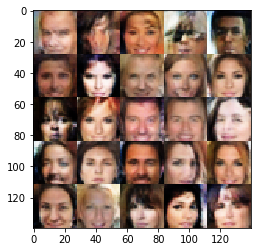

Epoch 1/1... Batch 20/32... Discriminator Loss: 1.3479... Generator Loss: 0.6888
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.2108... Generator Loss: 1.0585
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.2097... Generator Loss: 0.8012
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.1419... Generator Loss: 0.9951
Epoch 1/1... Batch 28/32... Discriminator Loss: 1.2473... Generator Loss: 1.2164
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.1790... Generator Loss: 0.7793
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.1739... Generator Loss: 0.9901
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.1258... Generator Loss: 0.9358
Epoch 1/1... Batch 4/32... Discriminator Loss: 1.1193... Generator Loss: 0.9057
Epoch 1/1... Batch 14/32... Discriminator Loss: 1.1836... Generator Loss: 0.8238


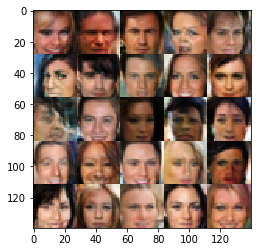

Epoch 1/1... Batch 24/32... Discriminator Loss: 1.2529... Generator Loss: 0.8757
Epoch 1/1... Batch 2/32... Discriminator Loss: 1.3127... Generator Loss: 0.5994
Epoch 1/1... Batch 12/32... Discriminator Loss: 1.1965... Generator Loss: 0.7564
Epoch 1/1... Batch 22/32... Discriminator Loss: 1.3563... Generator Loss: 0.5776
Epoch 1/1... Batch 0/32... Discriminator Loss: 1.3912... Generator Loss: 0.5816
Epoch 1/1... Batch 10/32... Discriminator Loss: 1.1721... Generator Loss: 0.8923
Epoch 1/1... Batch 20/32... Discriminator Loss: 1.1864... Generator Loss: 0.8368
Epoch 1/1... Batch 30/32... Discriminator Loss: 1.2471... Generator Loss: 0.7254
Epoch 1/1... Batch 8/32... Discriminator Loss: 1.1646... Generator Loss: 0.7474
Epoch 1/1... Batch 18/32... Discriminator Loss: 1.1407... Generator Loss: 0.8156


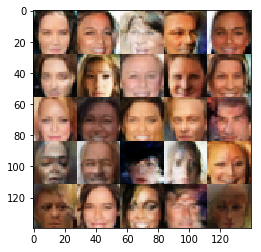

Epoch 1/1... Batch 28/32... Discriminator Loss: 1.2859... Generator Loss: 0.6090
Epoch 1/1... Batch 6/32... Discriminator Loss: 1.2611... Generator Loss: 1.0210
Epoch 1/1... Batch 16/32... Discriminator Loss: 1.2163... Generator Loss: 0.9015
Epoch 1/1... Batch 26/32... Discriminator Loss: 1.2054... Generator Loss: 0.7791


In [12]:
batch_size = 32
z_dim = 100
learning_rate = 0.0005
beta1 = 0.3



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.